In [1]:
# Import Libraries and Configure Matplotlib
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import re
import collections
from matplotlib import cm
from matplotlib import colors
from pycirclize import Circos
from tqdm import tqdm


In [2]:

# Initialize Circos with a single sector for nl43 ΔΔE
sectors = {"nl43 ΔΔE": 263}
circos = Circos(sectors, space=0, start=0, end=270)

# Get the sector
sector = circos.get_sector("nl43 ΔΔE")

# Add outer track for the main arc
track1 = sector.add_track((96, 98))
track1.rect(0, 263, fc="grey", ec="grey", lw=1.0)

# Add ticks and labels
major_ticks_pos = list(range(0, 263, 10))
major_ticks_labels = [str(i+1) if (i+1) % 10 == 1 else "" for i in major_ticks_pos]
all_ticks_pos = list(range(0, 263, 1))
all_ticks_labels = None

track1.xticks(major_ticks_pos, major_ticks_labels, label_size=10, tick_length=2,outer=False)
track1.xticks(all_ticks_pos, all_ticks_labels, label_size=8, tick_length=1,outer=False)
# Load and Parse data file
pairs = []
values_all = []



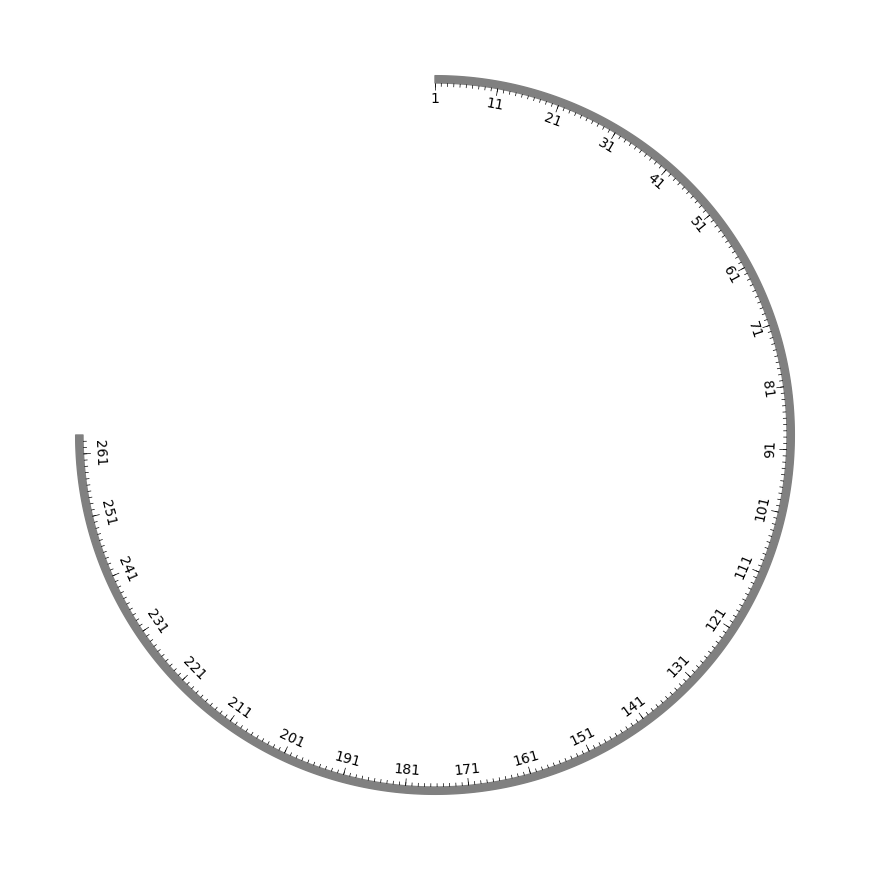

In [3]:
fig = circos.plotfig()
plt.show()

strictly follow the api of this exmple, for each position that has a mutaiton, annotate the specific drug and the drug resistant mutations it has:
    from pycirclize import Circos
from pycirclize.parser import Gff
from pycirclize.utils import load_prokaryote_example_file

gff_file = load_prokaryote_example_file("enterobacteria_phage.gff")
gff = Gff(gff_file)

seqid2size = gff.get_seqid2size()
space = 0 if len(seqid2size) == 1 else 2
circos = Circos(sectors=seqid2size, space=space)

seqid2features = gff.get_seqid2features(feature_type="CDS")
for sector in circos.sectors:
    track = sector.add_track((90, 100))
    track.axis(fc="#EEEEEE", ec="none")
    track.grid(2, color="black")

    features = seqid2features[sector.name]
    for feature in features:
        # Plot CDS feature
        if feature.location.strand == 1:
            track.genomic_features(feature, plotstyle="arrow", r_lim=(95, 100), fc="salmon")
        else:
            track.genomic_features(feature, plotstyle="arrow", r_lim=(90, 95), fc="skyblue")
        # Plot feature annotation label
        start, end = int(feature.location.start), int(feature.location.end)
        label_pos = (start + end) / 2
        label = feature.qualifiers.get("product", [""])[0]
        if label == "" or label.startswith("hypothetical"):
            continue
        track.annotate(label_pos, label, label_size=7)

fig = circos.plotfig()

use format: T66A/I/K drug: BIC, CAB, DTG, EVG, RAL

In [4]:
# Create dictionary for INSTI resistance mutations
insti_mutations = {
    "positions": [66, 92, 118, 138, 140, 143, 147, 148, 155, 263],
    "consensus": ["T", "E", "G", "E", "G", "Y", "S", "Q", "N", "R"],
    "drugs": {
        "Bictegravir (BIC)": ["K", "Q", "R", "KAT", "SAC", "", "", "HRK", "H", "K"],
        "Cabotegravir (CAB)": ["K", "Q", "R", "KAT", "SACR", "", "", "HRK", "H", "K"],
        "Dolutegravir (DTG)": ["K", "Q", "R", "KAT", "SAC", "", "", "HRK", "H", "K"],
        "Elvitegravir (EVG)": ["AIK", "Q", "R", "KAT", "SAC", "", "G", "HRK", "H", "K"],
        "Raltegravir (RAL)": ["AIK", "Q", "R", "KAT", "SAC", "RCH", "", "HRK", "H", "K"]
    }
}

print("INSTI Resistance Mutations Dictionary created:")
print(f"Positions: {insti_mutations['positions']}")
print(f"Consensus: {insti_mutations['consensus']}")
print("Drug-specific mutations:")
for drug, mutations in insti_mutations["drugs"].items():
    print(f"  {drug}: {mutations}")

INSTI Resistance Mutations Dictionary created:
Positions: [66, 92, 118, 138, 140, 143, 147, 148, 155, 263]
Consensus: ['T', 'E', 'G', 'E', 'G', 'Y', 'S', 'Q', 'N', 'R']
Drug-specific mutations:
  Bictegravir (BIC): ['K', 'Q', 'R', 'KAT', 'SAC', '', '', 'HRK', 'H', 'K']
  Cabotegravir (CAB): ['K', 'Q', 'R', 'KAT', 'SACR', '', '', 'HRK', 'H', 'K']
  Dolutegravir (DTG): ['K', 'Q', 'R', 'KAT', 'SAC', '', '', 'HRK', 'H', 'K']
  Elvitegravir (EVG): ['AIK', 'Q', 'R', 'KAT', 'SAC', '', 'G', 'HRK', 'H', 'K']
  Raltegravir (RAL): ['AIK', 'Q', 'R', 'KAT', 'SAC', 'RCH', '', 'HRK', 'H', 'K']


In [5]:
# Add annotation track for mutations
annotation_track = sector.add_track((90, 100))

# Annotate each mutation position with drug information
for i, pos in enumerate(insti_mutations["positions"]):
    circos_pos = pos - 1  # Convert to 0-based indexing
    consensus = insti_mutations["consensus"][i]
    
    # Find all drugs that have mutations at this position
    active_drugs = []
    for drug, mutations in insti_mutations["drugs"].items():
        if mutations[i] and mutations[i] != "":  # If there's a mutation for this drug at this position
            drug_abbrev = drug.split('(')[1].replace(')', '')
            active_drugs.append(drug_abbrev)
    
    if active_drugs:
        # Create label in format: T66A/I/K drug: BIC, CAB, DTG, EVG, RAL
        mutation_variants = insti_mutations["drugs"][list(insti_mutations["drugs"].keys())[0]][i]  # Get mutation variants from first drug
        for drug, mutations in insti_mutations["drugs"].items():
            if mutations[i] and mutations[i] != "":
                mutation_variants = mutations[i]
                break
        
        # Format mutations with slashes
        formatted_mutations = "/".join(list(mutation_variants)) if len(mutation_variants) > 1 else mutation_variants
        label = f"{consensus}{pos}{formatted_mutations} "
        # drug: {', '.join(active_drugs)}"
        # Annotate the position
        annotation_track.annotate(circos_pos, label, label_size=9, shorten=100)

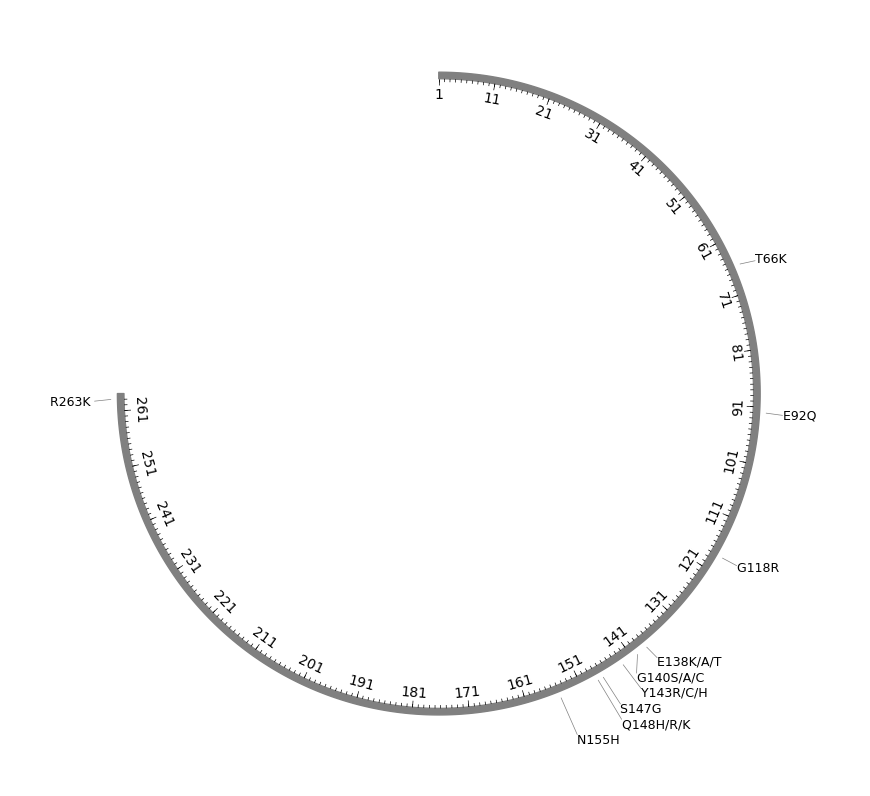

In [6]:
fig = circos.plotfig()
plt.show()

make a track that shows different segments with different colors as well as lablels: 1-50 as NTD, 50-212 as CCD, 212-end as CTD
add a tick track on top of this track, in each middle position, use tick label NTD, CCD and CTD like this: 
track1 = sector.add_track((98, 100))
track1.rect(0, 263, fc="grey", ec="grey", lw=1.0)

# Add ticks and labels
major_ticks_pos = list(range(0, 263, 10))
major_ticks_labels = [str(i+1) if (i+1) % 10 == 1 else "" for i in major_ticks_pos]
all_ticks_pos = list(range(0, 263, 1))
all_ticks_labels = None

track1.xticks(major_ticks_pos, major_ticks_labels, label_size=10)
track1.xticks(all_ticks_pos, all_ticks_labels, label_size=8)
# Load and Parse data file
pairs = []
values_all = []

In [7]:
# Add track for domain segments
track_domains = sector.add_track((80, 88))

# Draw domain boundaries first
track_domains.rect(0, 49, fc="white", ec="black", lw=1.0)
track_domains.rect(49, 211, fc="white", ec="black", lw=1.0)
track_domains.rect(211, 263, fc="white", ec="black", lw=1.0)

# Add tick track for domain labels
tick_track = sector.add_track((80.5, 80.5))

# Add domain labels at middle positions
domain_positions = [24.5, 130.5, 237]  # Middle of each domain
domain_labels = ["NTD", "CCD", "CTD"]

tick_track.xticks(domain_positions, domain_labels, label_size=12,tick_length=0)



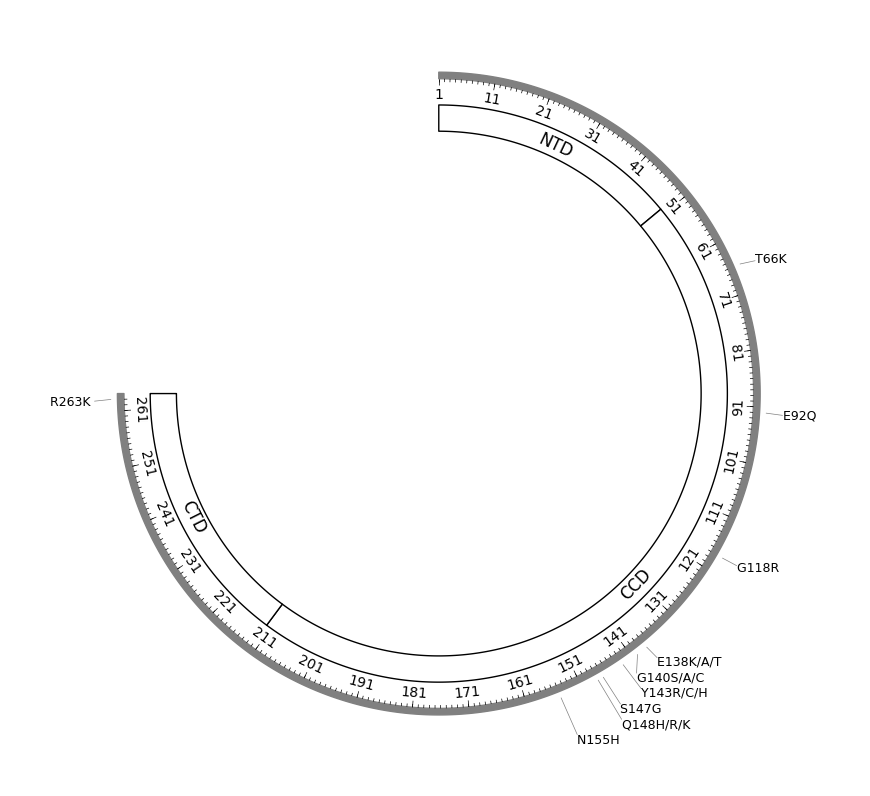

In [8]:
fig = circos.plotfig()
plt.show()

In [9]:
# with open('kn.her2.all') as f:
#     for line in f:
#         line = line.strip()
#         if not line:
#             continue
        
#         columns = re.split(r'[,\t\s]+', line)
#         mutations = columns[0]
#         ddE = float(columns[1])
        
#         positions = [int(pos) for pos in re.findall(r'\d+', mutations)]
        
#         if len(positions) != 2:
#             continue
        
#         p1 = max(1, min(263, positions[0]))
#         p2 = max(1, min(263, positions[1]))
        
#         pairs.append((p1, p2, ddE))
#         values_all.append(ddE)

# # Filter pairs
# filtered_pairs_background = [(p1, p2, ddE) for p1, p2, ddE in pairs if (ddE > 2.5 and ddE <= 3.5)]
# filtered_pairs_significant = [(p1, p2, ddE) for p1, p2, ddE in pairs if ddE > 3.5]

# vmin_background, vmax_background = min(ddE for _, _, ddE in filtered_pairs_background), max(ddE for _, _, ddE in filtered_pairs_background)
# vmin_significant, vmax_significant = min(ddE for _, _, ddE in filtered_pairs_significant), max(ddE for _, _, ddE in filtered_pairs_significant)

# # Process scatter plot data
# scatter_data = collections.defaultdict(list)

# with open('kn.her2.all') as f:
#     for line in f:
#         line = line.strip()
#         if not line:
#             continue
        
#         columns = re.split(r'[,\t\s]+', line)
        
#         try:
#             pos1, pos2 = [int(pos) for pos in re.findall(r'\d+', columns[0])]
#             delta_e1 = float(columns[3])
#             delta_e2 = float(columns[4])
#         except (IndexError, ValueError):
#             continue
        
#         pos1 = max(1, min(263, pos1))
#         pos2 = max(1, min(263, pos2))
#         scatter_data[pos1].append(delta_e1)
#         scatter_data[pos2].append(delta_e2)

# # Prepare scatter plot data
# positions = []
# values = []
# for pos, deltas in scatter_data.items():
#     for delta in set(deltas):
#         positions.append(pos - 1)  # Convert to 0-based
#         values.append(delta)


In [ ]:
# # Add inner track for scatter plot
# track2 = sector.add_track((50, 97))

# # Create scatter plot with color mapping
# scatter_cmap = cm.get_cmap('viridis')
# scatter_norm = colors.Normalize(vmin=min(values), vmax=max(values))

# # Plot scatter points with progress bar
# for pos, val in tqdm(zip(positions, values), total=len(positions), desc="Plotting scatter points"):
#     color = scatter_cmap(scatter_norm(val))
#     # Map the value to radius - more negative values extend further inward
#     radius = 50 + (val - min(values)) / (max(values) - min(values)) * 47
#     track2.scatter([pos], [radius], c=[color], s=2, alpha=0.8)

# # Add colorbar for scatter plot
# fig = circos.plotfig()
# scatter_mappable = cm.ScalarMappable(norm=scatter_norm, cmap=scatter_cmap)
# plt.colorbar(scatter_mappable, ax=fig.axes[0], label='ΔE values', shrink=0.5)
# plt.show()

C:\Users\xuech\AppData\Local\Temp\ipykernel_48804\201052095.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  scatter_cmap = cm.get_cmap('viridis')


NameError: name 'values' is not defined